In [1]:
print("Keep It Positive (Not Like That)")
print("Bennett Taylor")

Keep It Positive (Not Like That)
Bennett Taylor


In [30]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [31]:
"""init = State(R = None, L = None, E = None, V = None)
Γ = None
τ = None
μ = None
α = None
δ = None
σ = None
system = System(ri_rate=Γ*τ,
               rl_rate=rl_rate,
               re_rate=re_rate,
                ro_rate=μ,
                le_rate=α,
                eo_rate=δ,
                lo_rate=μ,
                vi_rate=vi_rate,
               vo_rate=σ)
print(system)"""

'init = State(R = None, L = None, E = None, V = None)\nΓ = None\nτ = None\nμ = None\nα = None\nδ = None\nσ = None\nsystem = System(ri_rate=Γ*τ,\n               rl_rate=rl_rate,\n               re_rate=re_rate,\n                ro_rate=μ,\n                le_rate=α,\n                eo_rate=δ,\n                lo_rate=μ,\n                vi_rate=vi_rate,\n               vo_rate=σ)\nprint(system)'

In [68]:
def make_system(r,tau,mu,alpha,delta,sigma,B,p,pi):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R = 1000, L = 0, E = 1, V = 100)
    
    dt= 0.1
    t0=0
    t_end=100

    return System(init=init, t0=t0, t_end=t_end,
                  r =r ,tau = tau, mu = mu,alpha = alpha,delta = delta,
                  sigma = sigma, B=B, p=p, pi=pi, dt=dt)

In [69]:
def update_func(state, dt, system):
    unpack(system)
    
    R, L, E, V = state
    
    drdt = r*tau - mu*R - B*R*V
    dldt = p*B*R*V - mu*L - alpha*L
    dedt = (1-p)*B*R*V + alpha*L-delta*E
    dvdt = pi*E - sigma*V

    R = drdt
    L = dldt
    E = dedt
    V = dvdt
    
    return State(R=R, L=L, E=E, V=V)

In [70]:
"""def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    timesteps = pd.Series(np.linspace(t0, t_end,int(t_end/dt)))
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], dt, system)
    
    
    return frame"""

SyntaxError: invalid syntax (<ipython-input-70-b0b880c7f437>, line 2)

In [71]:
system = make_system(1.36, 0.2, 1.36e-3, 3.6e-2, 0.33, 2, 0.00027, 0.1, 100 )


,values
init,R 1000 L 0 E 1 V 100 dtype:...
t0,0
t_end,100
r,1.36
tau,0.2
mu,0.00136
alpha,0.036
delta,0.33
sigma,2
B,0.00027


In [72]:
results, details = run_ode_solver(system, update_func)

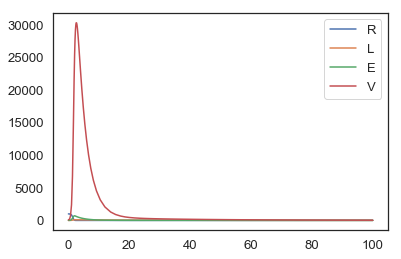

In [73]:
results.plot()